# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
import pandas as pd
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

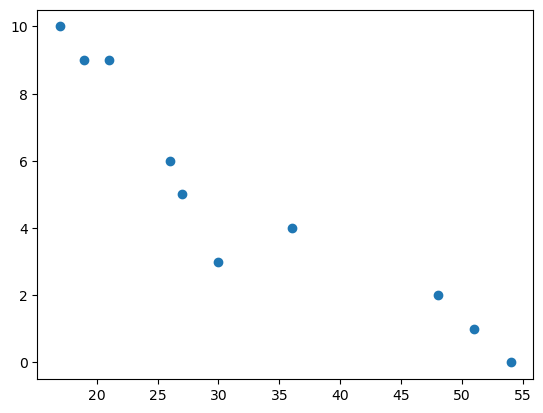

In [12]:
import matplotlib.pyplot as plt
plt.scatter(student_data["Age"],student_data["Tardies"])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
#Yes. There is a linear trend. Younger students, usually, have more tardies. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [19]:
import numpy as np
#correlation:The correlation is very high, very close to 1, 0.93. It indicates that the metrics have a strong correlation in this case.

print(student_data.corr())

#covariance: There is a negative strong covariance. They are moving down and the points are forming a line

print(np.cov(student_data))

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
[[  24.5  175.    77.    42.   112.   161.    35.    70.   189.    94.5]
 [ 175.  1250.   550.   300.   800.  1150.   250.   500.  1350.   675. ]
 [  77.   550.   242.   132.   352.   506.   110.   220.   594.   297. ]
 [  42.   300.   132.    72.   192.   276.    60.   120.   324.   162. ]
 [ 112.   800.   352.   192.   512.   736.   160.   320.   864.   432. ]
 [ 161.  1150.   506.   276.   736.  1058.   230.   460.  1242.   621. ]
 [  35.   250.   110.    60.   160.   230.    50.   100.   270.   135. ]
 [  70.   500.   220.   120.   320.   460.   100.   200.   540.   270. ]
 [ 189.  1350.   594.   324.   864.  1242.   270.   540.  1458.   729. ]
 [  94.5  675.   297.   162.   432.   621.   135.   270.   729.   364.5]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
from sklearn import linear_model
x=student_data[["Age"]]
y=student_data["Tardies"]

model=linear_model.LinearRegression()
result=model.fit(x,y)

pred=result.predict(x)
pred

#Outcome variable is below. I am using a linear regression since the numbers follow a trendline

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

Plot your regression model on your scatter plot.

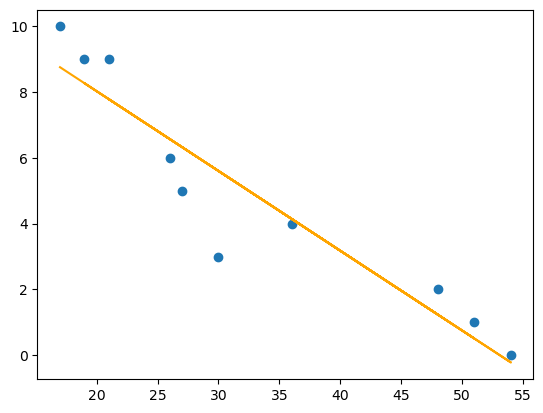

In [24]:
regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line,c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [27]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error (pred,y)))
print(result.score(x,y))

#I belive the model is strong enough and I am quite confident. The mean_squared_error and r2 helped me to get into this conclusion.
#r2 is close to 1 and the error does not show an expressive variation from the points collected on the original dataframe.

1.1540884648655088
0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [29]:
vehicles=pd.read_csv("C:/Users/milena.xavier/Desktop/Iron/Labs/Week 4/lab-regression-analysis/your-code/vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
#the strongest variable is "Fuel Barrels/Year" since it has the highest correlation, closer to 1. Also, the least correlated variable is "Year" with a correlation of only 0.22

vehicles.corr()


,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [34]:
x=vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y=vehicles['CO2 Emission Grams/Mile']

model=linear_model.LinearRegression()
result=model.fit(x,y)

regression_line = result.intercept_+result.coef_[0]*x+result.coef_[1]*x+result.coef_[2]*x+result.coef_[3]*x+result.coef_[4]*x

pred=result.predict(x)
model.score(x,y)

#I used a linear model since I have checked that there is a strng correlation on the item before.
#Also, I calculate r2 and the result is very close to 1 indicating that a linear regression works well for this case.

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [35]:
pred

#the most important veriables is "Fuel Barrels/Year" since it has the highest correlation with the y variable. 
#As I said before, I am quit confident since the r2 is very close to 1. 

array([522.03038361, 671.00105318, 552.68495072, ..., 230.01342446,
       229.69280773, 239.33283552])

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [36]:
party_data = pd.DataFrame({'Invites': [1,3,4,6,8,9,11,14], 'Attenders': [1,2,4,4,5,7,8,13]})
party_data

,Invites,Attenders
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

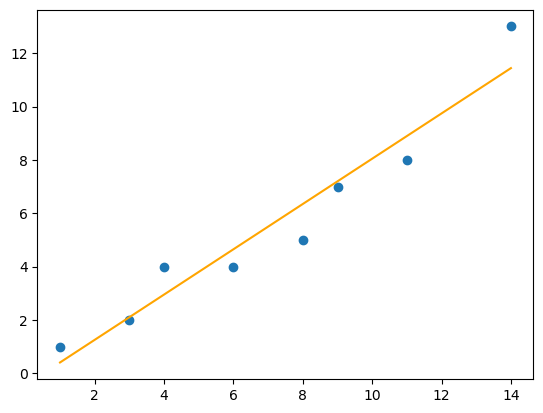

In [38]:
x=party_data[["Invites"]]
y=party_data["Attenders"]

model=linear_model.LinearRegression()
result=model.fit(x,y)

pred=result.predict(x)

regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line,c="orange")
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [41]:
print(pred)
print(model.score(x,y))
print(np.sqrt(mean_squared_error (pred,y)))

#the linear model works fine for this example as well. The r2 is close to one and the deviation of my prediction is 0.93 guest for more or less.



[ 0.40909091  2.10606061  2.95454545  4.65151515  6.34848485  7.1969697
  8.89393939 11.43939394]
0.9316696375519905
0.9333874443188752


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

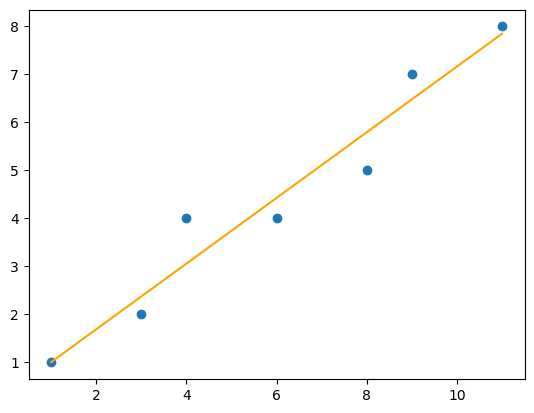

0.9433811802232854
0.5523118096904349


In [48]:

#create a function to find outliers using IQR

def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

find_outliers_IQR(party_data)

#I figured out that the only outlier (outside the quartiles ), the last point. 
#Now, lets create a linear model without the last point

party_data.drop(party_data[(party_data['Invites'] ==14)].index, inplace=True)

x=party_data[["Invites"]]
y=party_data["Attenders"]

model=linear_model.LinearRegression()
result=model.fit(x,y)

pred=result.predict(x)

regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line,c="orange")
plt.scatter(x,y)
plt.show()

#let's calculate the accurancy of the new model:

print(model.score(x,y))
print(np.sqrt(mean_squared_error (pred,y)))

#Now, this modelis more accurate since r2 is closer to 1 and the deviation of attenders is just 0.55 instead of 0.93 guests.


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#Now, this modelis more accurate since r2 is closer to 1 and the deviation of attenders is just 0.55 instead of 0.93 guests.
